In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('database playstore/googleplaystore.csv')

# Discovery

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [9]:
# cercherò di capire se ci sono spazi nel mercato delle app
# forse in alcune categorie non ci sono app con valutazioni alte, 
# oppure ci sono poche app

In [10]:
# toglierò le ultime due colonne perchè non sono utili alla mia analisi
# toglierò la colonna Reviews perchè c'è già la colonna Installs, 
# e per la mia analisi si equivalgono
# toglierò la colonna Size perchè con il progresso tecnologico non è più un problema
# infine toglierò le app senza il valore Rating

# Data Selection e Data Cleaning

In [11]:
# iniziamo facendo data cleaning, vogliamo i dati di tipo numerico e 
# vogliamo togliere dati inseriti male

In [12]:
df = df.drop(['Current Ver', 'Android Ver', 'Reviews', 'Size'], axis=1)

In [13]:
df.groupby(['Category']).mean().round(2)

,Rating
Category,
1.9,19.00
ART_AND_DESIGN,4.36
AUTO_AND_VEHICLES,4.19
BEAUTY,4.28
BOOKS_AND_REFERENCE,4.35
BUSINESS,4.12
COMICS,4.16
COMMUNICATION,4.16
DATING,3.97


In [14]:
df = df.drop(df.loc[df["Category"] =='1.9'].index)

In [15]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

/tmp/ipykernel_114268/1670448764.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


In [16]:
df = df.astype({'Installs': 'int32'})

In [17]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [18]:
df['Price'] = df['Price'].str.replace('$','')

/tmp/ipykernel_114268/1580091000.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')


In [19]:
df = df.astype({'Price': 'float'})

In [20]:
df = df.dropna(subset='Rating')

# Data Exploration e Data Transformation

In [21]:
# iniziamo ad esplorare ed analizzare i dati

In [22]:
df.head()

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Installs        9366 non-null   int32         
 4   Type            9366 non-null   object        
 5   Price           9366 non-null   float64       
 6   Content Rating  9366 non-null   object        
 7   Genres          9366 non-null   object        
 8   Last Updated    9366 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 695.1+ KB


In [24]:
df.corr()

,Rating,Installs,Price
Rating,1.000000,0.051355,-0.021903
Installs,0.051355,1.000000,-0.011890
Price,-0.021903,-0.011890,1.000000


In [25]:
# le correlazioni non sono molto forti
# andiamo a cercare le categorie e i rating e vediamo cosa viene fuori

In [26]:
cat_group = df.groupby('Category').Rating.mean()
cat_group

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

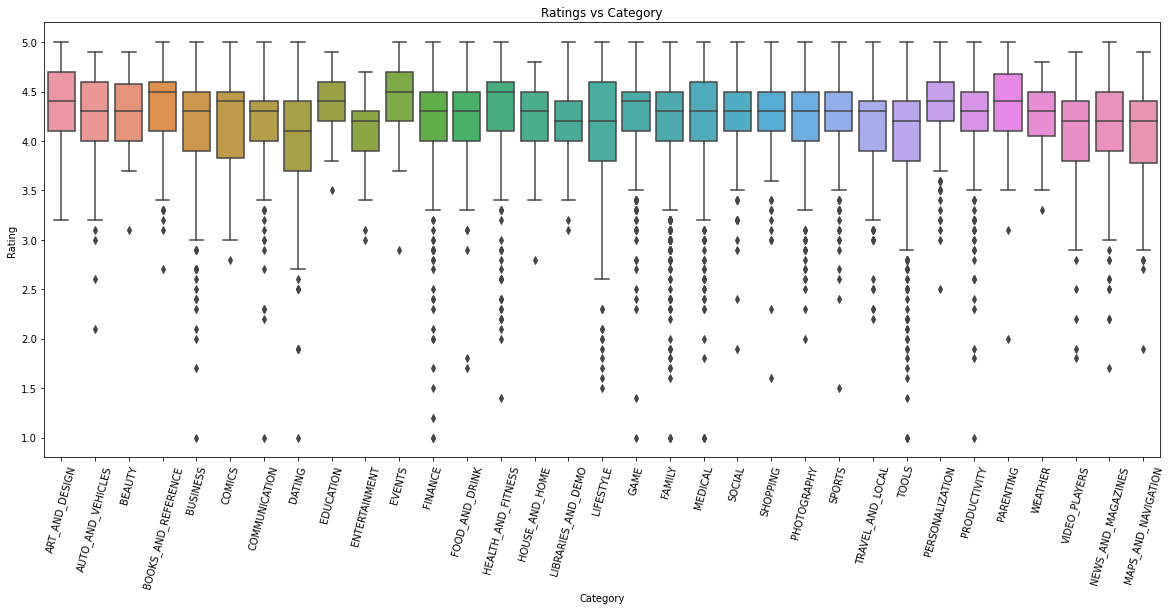

In [27]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='Category', y='Rating')
plt.title('Ratings vs Category')
plt.xticks(rotation=75);

In [28]:
cat_group = df.groupby('Category')
cat_group = cat_group.filter(lambda x: x['Rating'].mean() < 4.2)
cat_group

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
49,Monster Truck Stunt 3D 2019,AUTO_AND_VEHICLES,4.2,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-10
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-26
51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,100000,Free,0.0,Everyone,Auto & Vehicles,2018-07-26
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30
53,American Muscle Car Race,AUTO_AND_VEHICLES,3.9,100000,Free,0.0,Everyone,Auto & Vehicles,2018-07-26
...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,100000,Free,0.0,Everyone,News & Magazines,2014-01-20
10834,FR Calculator,FAMILY,4.0,500,Free,0.0,Everyone,Education,2017-06-18
10836,Sya9a Maroc - FR,FAMILY,4.5,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,100,Free,0.0,Everyone,Education,2018-07-06


In [29]:
cat_group.groupby('Category').Rating.mean()

Category
AUTO_AND_VEHICLES      4.190411
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
ENTERTAINMENT          4.126174
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PHOTOGRAPHY            4.192114
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292
VIDEO_PLAYERS          4.063750
Name: Rating, dtype: float64

In [30]:
genres_group = df.groupby('Genres')
genres_group = genres_group.filter(lambda x: x['Rating'].mean() < 4.0)
genres_group['Genres'].value_counts()

Dating                                 195
Educational                             32
Educational;Creativity                   5
Parenting;Education                      3
Art & Design;Pretend Play                2
Parenting;Brain Games                    1
Health & Fitness;Action & Adventure      1
Name: Genres, dtype: int64

In [31]:
genres_group.groupby('Genres').Rating.mean()

Genres
Art & Design;Pretend Play              3.900000
Dating                                 3.970769
Educational                            3.871875
Educational;Creativity                 3.960000
Health & Fitness;Action & Adventure    3.900000
Parenting;Brain Games                  3.800000
Parenting;Education                    3.866667
Name: Rating, dtype: float64

In [32]:
# Credo che la migliore opzione sia continuare considerando i generi della cella
# sopra, però senza la categoria dating che è satura

In [33]:
genres_low_rat = ['Art & Design;Pretend Play', 'Educational', 'Educational;Creativity', 'Health & Fitness;Action & Adventure', 'Parenting;Brain Games', 'Parenting;Education']
mask = df['Genres'].isin(genres_low_rat)

In [34]:
low_rat_df = df[mask]

In [35]:
low_rat_df = low_rat_df.reset_index()

In [36]:
low_rat_df = low_rat_df.drop(['index'], axis=1)

In [37]:
low_rat_df.head()

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Coloring book moana,ART_AND_DESIGN,3.9,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15
1,Coloring & Learn,FAMILY,4.4,5000000,Free,0.00,Everyone,Educational;Creativity,2018-07-17
2,Coloring book moana,FAMILY,3.9,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15
3,Toca Mystery House,FAMILY,4.2,5000,Paid,3.99,Everyone,Educational;Creativity,2018-06-14
4,Pinkalicious Party,FAMILY,3.0,500,Paid,2.99,Everyone,Educational;Creativity,2018-06-25


In [38]:
low_rat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             44 non-null     object        
 1   Category        44 non-null     object        
 2   Rating          44 non-null     float64       
 3   Installs        44 non-null     int32         
 4   Type            44 non-null     object        
 5   Price           44 non-null     float64       
 6   Content Rating  44 non-null     object        
 7   Genres          44 non-null     object        
 8   Last Updated    44 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 3.0+ KB


In [39]:
low_rat_df.groupby('Genres').App.count()

Genres
Art & Design;Pretend Play               2
Educational                            32
Educational;Creativity                  5
Health & Fitness;Action & Adventure     1
Parenting;Brain Games                   1
Parenting;Education                     3
Name: App, dtype: int64

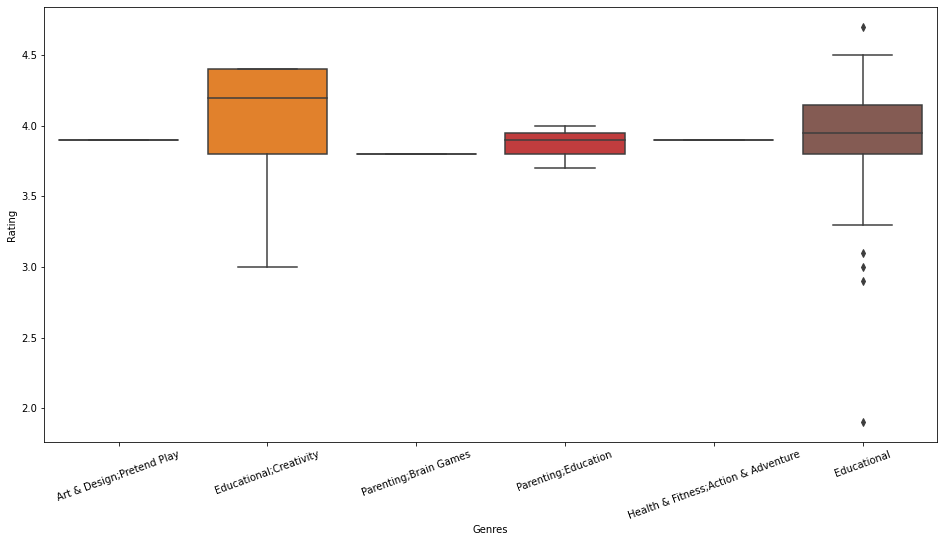

In [40]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=low_rat_df, x='Genres', y='Rating')
plt.xticks(rotation=20);

In [41]:
# Vediamo che tra i pochi risultati rimasti, ci sono buone prospettive se lanciassimo
# sul mercato un'app di educazione o di genitorialità (parenting),
# meglio ancora unendo i due generi.

In [42]:
# Anche visualizzando usando i boxplot, rimane chiaro che i generi 'parenting;education'
# e 'parenting;brain games' siano i migliori su cui puntare.
# Molto interessante anche il genere Educational, ci sono molte app, molti download,
# ma il rating basso fa pensare che manchi una app di qualitá adeguata

In [43]:
# Andiamo adesso a cercare di capire invece le caratteristiche delle app di successo

In [44]:
mask1 = df['Rating'] > 4.49

In [45]:
mask2 = df['Installs'] > 9000000

In [46]:
mask3 = df['Type'] == 'Paid'

In [47]:
top_apps = df[mask2]

In [48]:
top_rat = df[mask1]

In [49]:
top_apps

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000,Free,0.0,Teen,Art & Design,2018-06-08
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,10000000,Free,0.0,Teen,Art & Design,2018-04-02
19,ibis Paint X,ART_AND_DESIGN,4.6,10000000,Free,0.0,Everyone,Art & Design,2018-07-30
42,Textgram - write on photos,ART_AND_DESIGN,4.4,10000000,Free,0.0,Everyone,Art & Design,2018-07-30
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,10000000,Free,0.0,Everyone,Art & Design,2018-07-31
...,...,...,...,...,...,...,...,...,...
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,10000000,Free,0.0,Everyone,Libraries & Demo,2018-04-23
10740,PhotoFunia,PHOTOGRAPHY,4.3,10000000,Free,0.0,Everyone,Photography,2017-06-03
10781,Modern Strike Online,GAME,4.3,10000000,Free,0.0,Teen,Action,2018-07-30
10784,Big Hunter,GAME,4.3,10000000,Free,0.0,Everyone 10+,Action,2018-05-31


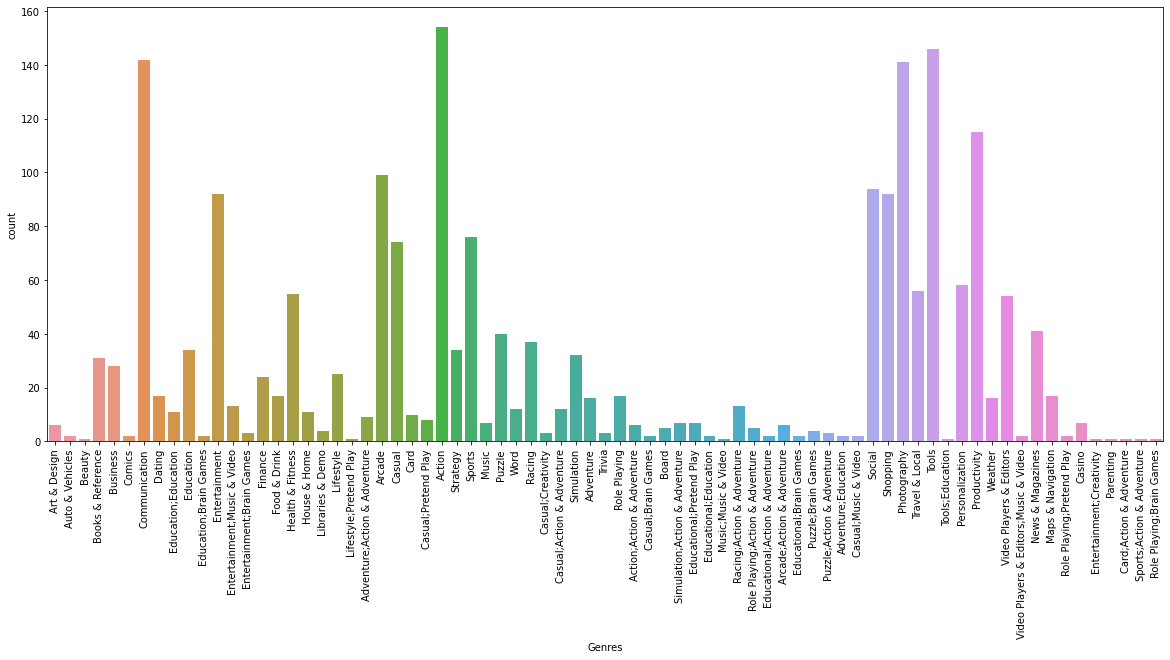

In [50]:
plt.figure(figsize=(20, 8))
sns.countplot(data=top_apps, x='Genres')
plt.xticks(rotation=90);

In [51]:
# countplot con tutte le app da 10 milioni di installazioni in su
# spiccano generi della categoria gaming
# ci sono tanti generi con pochissime app, si potrebbe valutare di mettere sul mercato
# un'app che avrebbe poca concorrenza

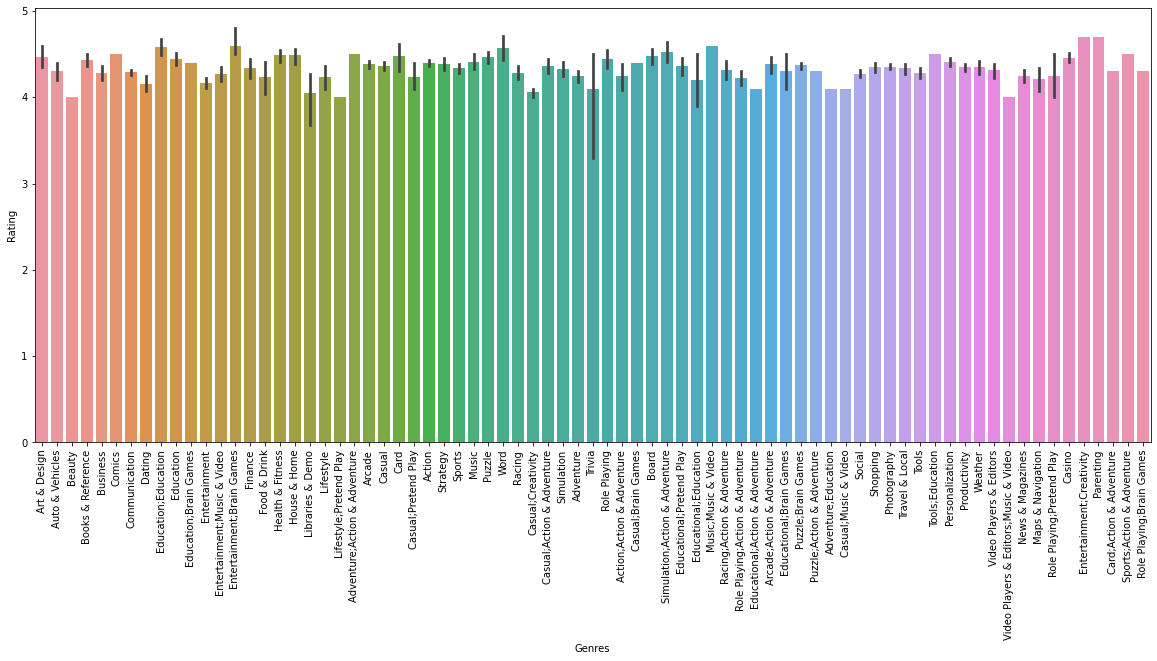

In [52]:
plt.figure(figsize=(20, 8))
sns.barplot(data=top_apps, x='Genres', y='Rating')
plt.xticks(rotation=90);

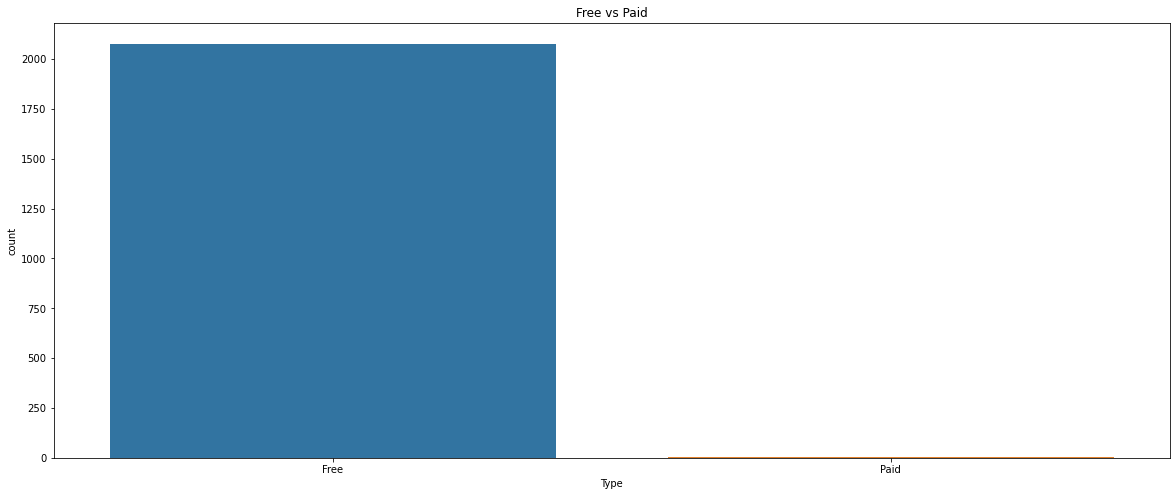

In [53]:
plt.figure(figsize=(20, 8))
sns.countplot(data=top_apps, x='Type')
plt.title('Free vs Paid');

In [54]:
# adesso cerchiamo le stesse cose sulle app ad alto rating

In [55]:
top_rat

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000,Free,0.0,Teen,Art & Design,2018-06-08
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,100000,Free,0.0,Everyone,Art & Design,2018-06-26
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,500000,Free,0.0,Everyone,Art & Design,2018-07-31
...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,1000,Free,0.0,Everyone,Books & Reference,2014-03-23
10836,Sya9a Maroc - FR,FAMILY,4.5,5000,Free,0.0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,100,Free,0.0,Everyone,Education,2018-07-06
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


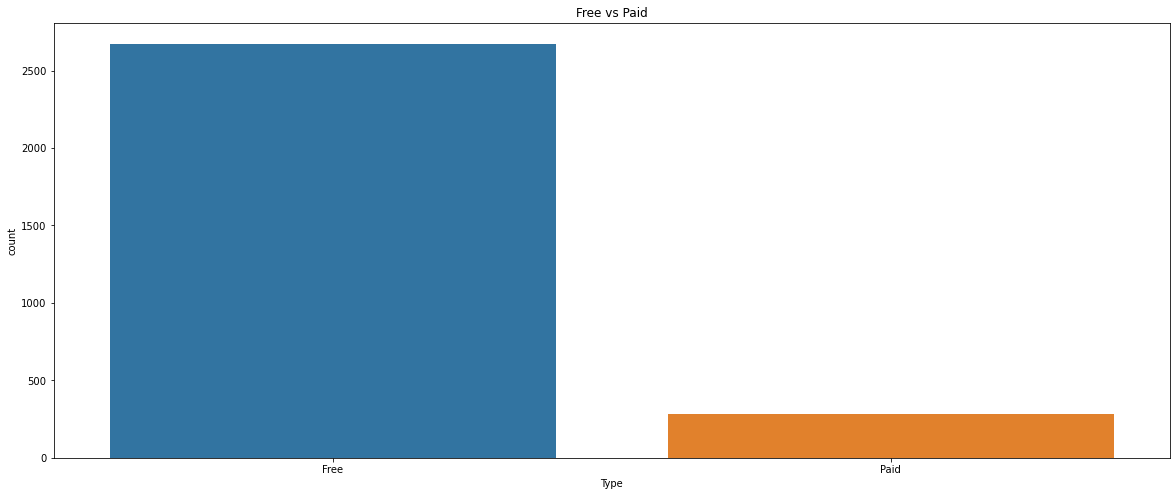

In [56]:
plt.figure(figsize=(20, 8))
sns.countplot(data=top_rat, x='Type')
plt.title('Free vs Paid');

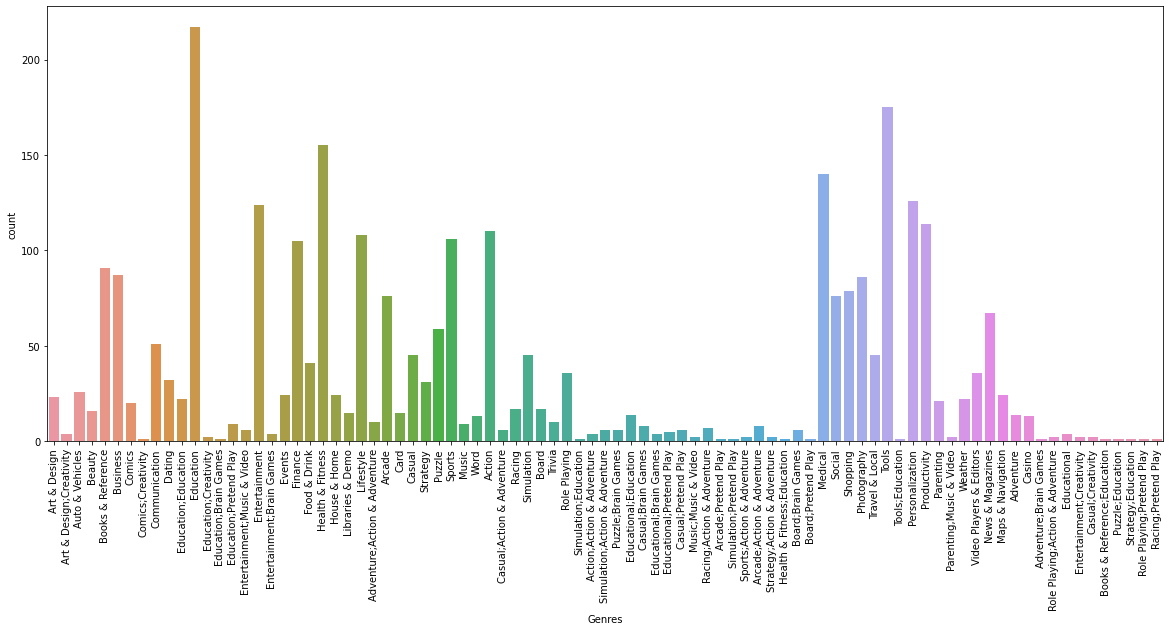

In [57]:
plt.figure(figsize=(20, 8))
sns.countplot(data=top_rat, x='Genres')
plt.xticks(rotation=90);

In [58]:
top_rat_paid = df[mask1 & mask3]

In [59]:
top_rat_paid

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,100000,Paid,4.99,Everyone,Business,2018-03-25
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,100000,Paid,4.99,Everyone,Business,2017-04-11
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,100000,Paid,4.99,Everyone,Business,2018-03-25
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,100000,Paid,4.99,Everyone,Business,2017-04-11
851,Sago Mini Hat Maker,EDUCATION,4.9,1000,Paid,3.99,Everyone,Education;Pretend Play,2017-07-24
...,...,...,...,...,...,...,...,...,...
10531,Kernel Manager for Franco Kernel ✨,TOOLS,4.8,100000,Paid,3.49,Everyone,Tools,2018-08-03
10570,FL SW Fishing Regulations,SPORTS,4.6,1000,Paid,1.99,Everyone,Sports,2014-03-07
10679,Solitaire+,GAME,4.6,100000,Paid,2.99,Everyone,Card,2018-07-30
10690,FO Bixby,PERSONALIZATION,5.0,100,Paid,0.99,Everyone,Personalization,2018-04-25


In [60]:
# ci sono 281 app a pagamento con rating >= 4.5

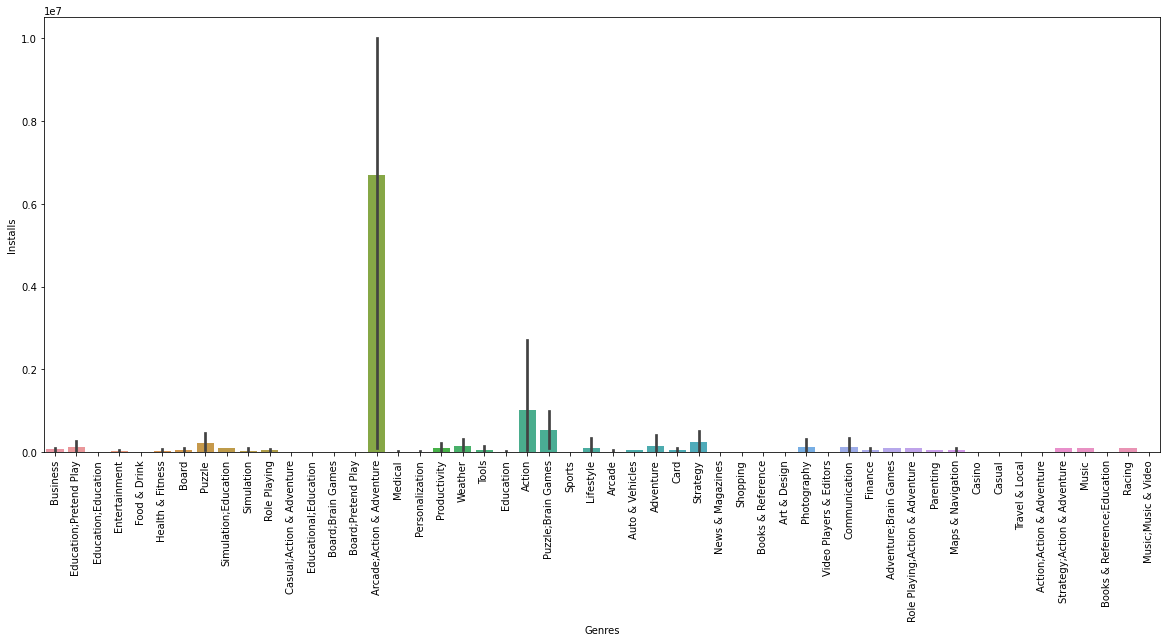

In [61]:
plt.figure(figsize=(20, 8))
sns.barplot(data=top_rat_paid, x='Genres', y='Installs')
plt.xticks(rotation=90);

In [62]:
# ci sono tanti giochi molto scaricati e molto apprezzati

In [63]:
df_paid = df[mask3]

In [64]:
df_paid.corr()

,Rating,Installs,Price
Rating,1.000000,0.059029,-0.112951
Installs,0.059029,1.000000,-0.023467
Price,-0.112951,-0.023467,1.000000


In [65]:
# installazioni e prezzo hanno una correlazione negativa ma molto poco significativa

In [67]:
# Per concludere direi che:
# I generi 'parenting;education'
# e 'parenting;brain games' siano i migliori se vogliamo puntare ad una nicchia
# di mercato con poche applicazioni. Lo vediamo anche nel grafico nella cella 50.
# Il genere Educational ha invece ,molte molte app, molti download,
# ma il rating basso fa pensare che manchi una app di qualitá adeguata.
# Altrimenti il genere Gaming ha molto successo, app a pagamento ricevono molti download
# e valutazioni alte.